## Esercizio Time Series

<img src='https://www.investopedia.com/thmb/6EKKyc5osPzwjc5pNtGz64fQWmE=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/TermDefinitions_TimeSeries__V1_CT-e4cb9fe23caf415491b1e850a1be300b.png' width=800>


In [35]:
# !wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/ads.csv

In [36]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

path = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/ads.csv'

df = pd.read_csv(path)

df

,Time,Ads
0,2017-09-13T00:00:00,80115
1,2017-09-13T01:00:00,79885
2,2017-09-13T02:00:00,89325
3,2017-09-13T03:00:00,101930
4,2017-09-13T04:00:00,121630
...,...,...
211,2017-09-21T19:00:00,155890
212,2017-09-21T20:00:00,123395
213,2017-09-21T21:00:00,103080
214,2017-09-21T22:00:00,95155


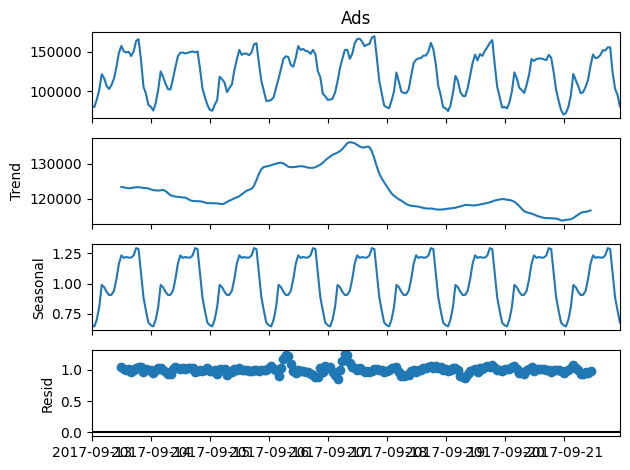

In [37]:
# Fare EDA e decomposition
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Convertire 'Time' in datetime
df['Time'] = pd.to_datetime(df['Time'])

# Impostare 'Time' come indice
df.set_index('Time', inplace=True)

# Decomposizione stagionale
result = seasonal_decompose(df['Ads'], model='multiplicative', period=24)
result.plot()
plt.show()

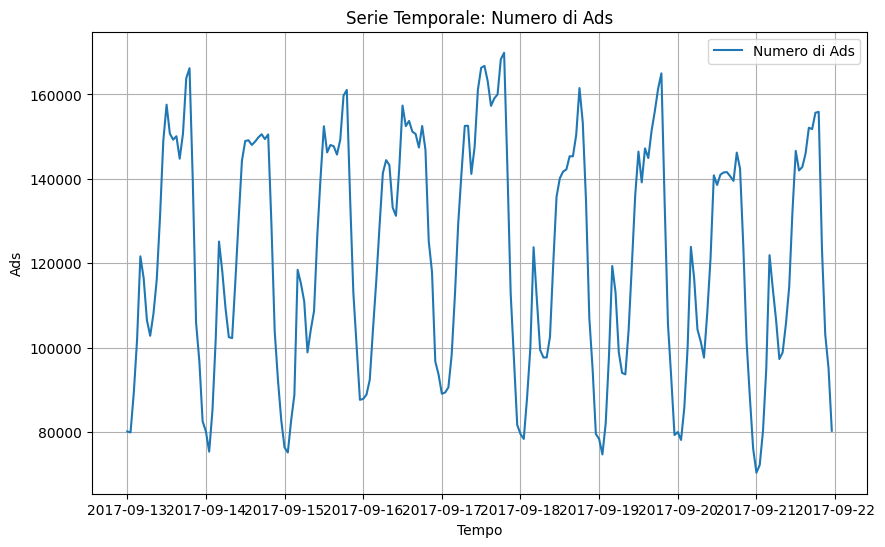

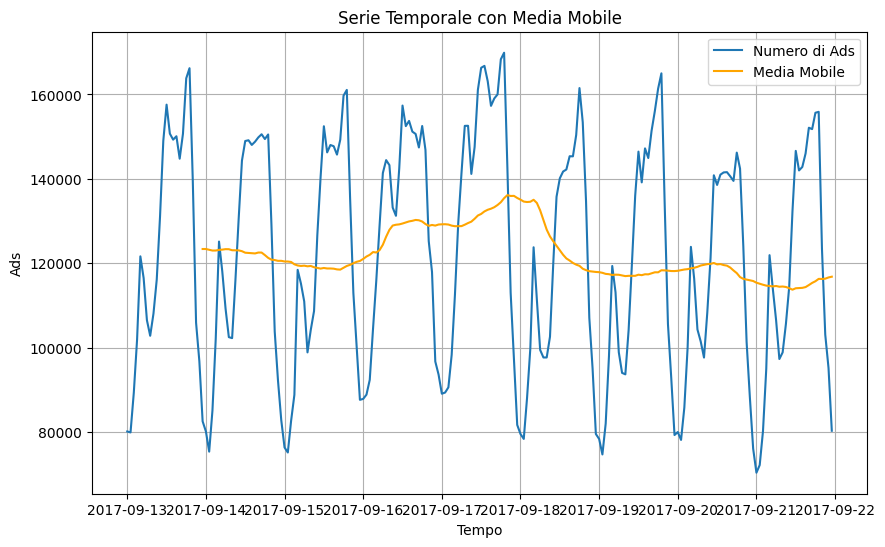

In [38]:
# Fare Plotting

# Plotting della serie temporale
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ads'], label='Numero di Ads')
plt.title('Serie Temporale: Numero di Ads')
plt.xlabel('Tempo')
plt.ylabel('Ads')
plt.legend()
plt.grid(True)
plt.show()

# Plot della media mobile per osservare la tendenza
df['Rolling_Mean'] = df['Ads'].rolling(window=24).mean()  # Scegli la finestra in base ai tuoi dati (es. 24 ore)
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ads'], label='Numero di Ads')
plt.plot(df.index, df['Rolling_Mean'], color='orange', label='Media Mobile')
plt.title('Serie Temporale con Media Mobile')
plt.xlabel('Tempo')
plt.ylabel('Ads')
plt.legend()
plt.grid(True)
plt.show()

P-Value: 4.4448036886224977e-10
P-Value (Differenziato): 6.262978380424213e-09


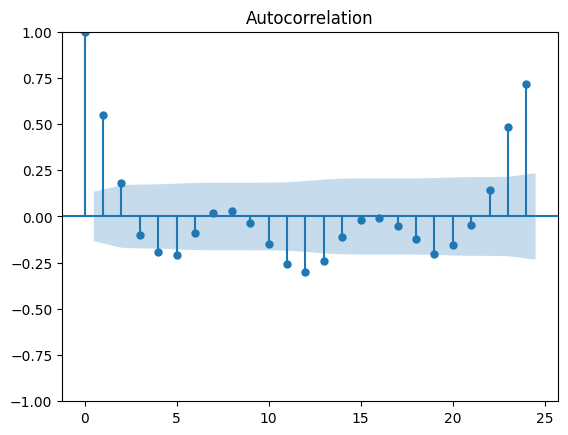

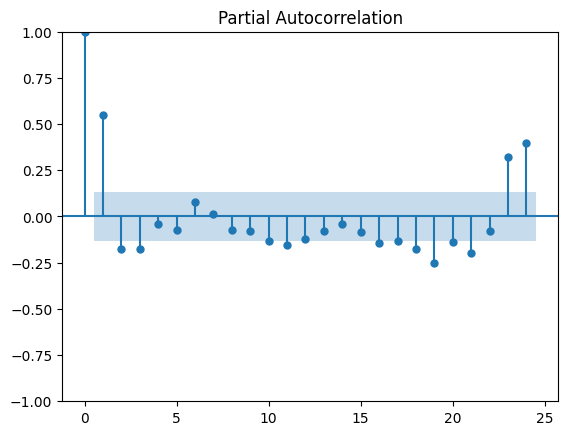

                               SARIMAX Results                                
Dep. Variable:                    Ads   No. Observations:                  216
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2290.592
Date:                Thu, 27 Feb 2025   AIC                           4587.185
Time:                        11:03:41   BIC                           4597.296
Sample:                    09-13-2017   HQIC                          4591.270
                         - 09-21-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3568      0.099      3.622      0.000       0.164       0.550
ma.L1          0.1478      0.120      1.229      0.219      -0.088       0.383
sigma2      9.704e+07   6.89e-10   1.41e+17      0.0

In [39]:
from statsmodels.tsa.stattools import adfuller

# Test di Dickey-Fuller per verificare la stazionarietà
result = adfuller(df['Ads'])
print(f'P-Value: {result[1]}')

# Se i dati non sono stazionari, differenziare i dati
df_diff = df['Ads'].diff().dropna()

# Di nuovo, controlla la stazionarietà dopo la differenziazione
result_diff = adfuller(df_diff)
print(f'P-Value (Differenziato): {result_diff[1]}')

# Identificare i parametri ARIMA (p, d, q) usando ACF e PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_diff)
plot_pacf(df_diff)
plt.show()

# Definizione del modello ARIMA (esempio con p=1, d=1, q=1)
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Ads'], order=(1, 1, 1))
model_fit = model.fit()

# Sommario del modello ARIMA
print(model_fit.summary())

# Fare previsioni (ad esempio per i prossimi 10 periodi)
forecast = model_fit.forecast(steps=10)
print(forecast)

In [40]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Definire il numero di split
tscv = TimeSeriesSplit(n_splits=5)

# Eseguire cross-validation
errors = []

for train_index, test_index in tscv.split(df):
    train, test = df.iloc[train_index], df.iloc[test_index]
    
    # Creare e addestrare il modello ARIMA per ogni split
    model = ARIMA(train['Ads'], order=(1, 1, 1))
    model_fit = model.fit()
    
    # Fare previsioni
    predictions = model_fit.forecast(steps=len(test))
    
    # Calcolare l'errore
    error = mean_squared_error(test['Ads'], predictions)
    errors.append(error)

# Calcolare l'errore medio
print(f'Mean Squared Error (MSE): {sum(errors)/len(errors)}')

Mean Squared Error (MSE): 2245303995.5402
